# Gibbs Free Energy Curve Fitting


In [11]:
# Define the GFE equations for the alpha and the delta phase

import sympy 
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from scipy.misc import derivative
import mpmath 


## Delta Hydride

### Gibbs Free Energy

-13955.664476228656
-183907.45066302852
11385
-62795.0
[ 1929449.96936419 -2962260.20509996  1705085.4440241   -536094.65919321
    29204.58666168   -16960.29263291]


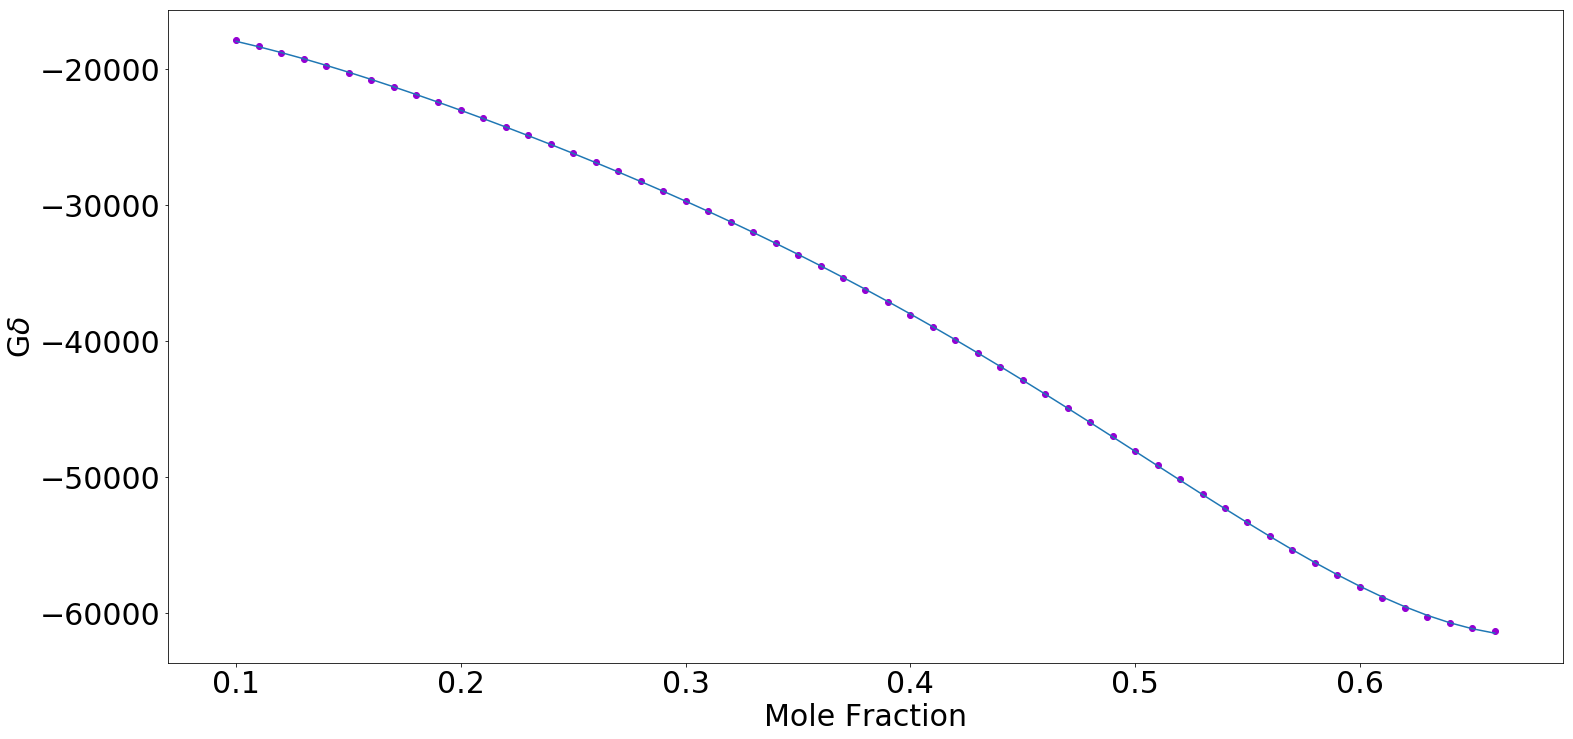

In [42]:
a = 1
b = 2
T=500
R = 8.314 #J/molK

GDelta_V = -227.595+124.74905*T-24.1618*T*np.log(T)-0.00437791*(T**(2))+34971*(1/T)
print(GDelta_V)
GDelta_H = (-170490.0+208.2*T-9.47*T*np.log(T)) + 1*(-7827.595+125.64905*T-24.1618*T*np.log(T)-0.00437791*(T**(2))+34971.0*(1/T))+2*(0.5*(-9522.9741+78.5273879*T-31.35707*T*np.log(T)+0.0027589925*(T**(2))-7.46390667*(10**(-7))*(T**(3))+56582.3*(1/T)))  
print(GDelta_H )
Lzr_zero = 14385-6*T
print(Lzr_zero)
Lzr_one = -106445.0+87.3*T
print(Lzr_one)



def deltagibbs(x):
    f= ((2-3*x)/2*GDelta_V) + (x/2*GDelta_H) + 1/(a+((a*x/(1-x))))*(((a/b)*x/(1-x))*(1-((a/b)*x/(1-x)))*(Lzr_zero + Lzr_one*(2*((a/b)*x/(1-x))-1)**1))
    return (f)

x=np.arange(0.1,0.667,0.01)
fig, ax = plt.subplots(figsize=(25,12))
plt.scatter(x,deltagibbs(x), color='darkviolet')
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel('Mole Fraction',fontsize=30)
plt.ylabel('G$\delta$',fontsize=30)
plt.plot()


#Polynomial Fitting
pdelta =np.polyfit(x,deltagibbs(x),5)
print(pdelta)


PolyEqu = pdelta[0]*x**5 + pdelta[1]*x**4 + pdelta[2]*x**3 + pdelta[3]*x**2 +pdelta[4]*x + pdelta[5]
plt.plot(x,PolyEqu)

 

### Chemical Potential

1929449.96936419*x**5 - 2962260.20509996*x**4 + 1705085.4440241*x**3 - 536094.659193214*x**2 + 4157.0*x*log(x) + 29204.5866616836*x + 4157.0*(-x + 0.667)*log(-x + 0.667) - 16960.2926329115
9647249.84682096*x**4 - 11849040.8203998*x**3 + 5115256.33207231*x**2 - 1072189.31838643*x - (-4157.0*x + 2772.719)/(-x + 0.667) + 4157.0*log(x) - 4157.0*log(-x + 0.667) + 33361.5866616836


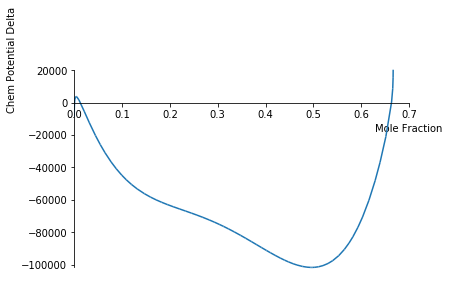

In [51]:
#The chemical potential is found by calculating the derivative of the gibbs free energy
x = Symbol('x')
a = pdelta[0]*x**5 + pdelta[1]*x**4 + pdelta[2]*x**3 + pdelta[3]*x**2 +pdelta[4]*x + pdelta[5] + R*T*(x*ln(x) + (0.667-x)*ln(0.667-x)) 
print(a)
chemical_pot_delta = diff(a, x)
print(chemical_pot_delta)


plot(chemical_pot_delta, (x,0,0.7), xlabel= 'Mole Fraction',ylabel='Chem Potential Delta')

## Alpha Phase

### The Gibbs Free Energy of the Alpha Phase

[-37552.14394416 -21105.66447623]


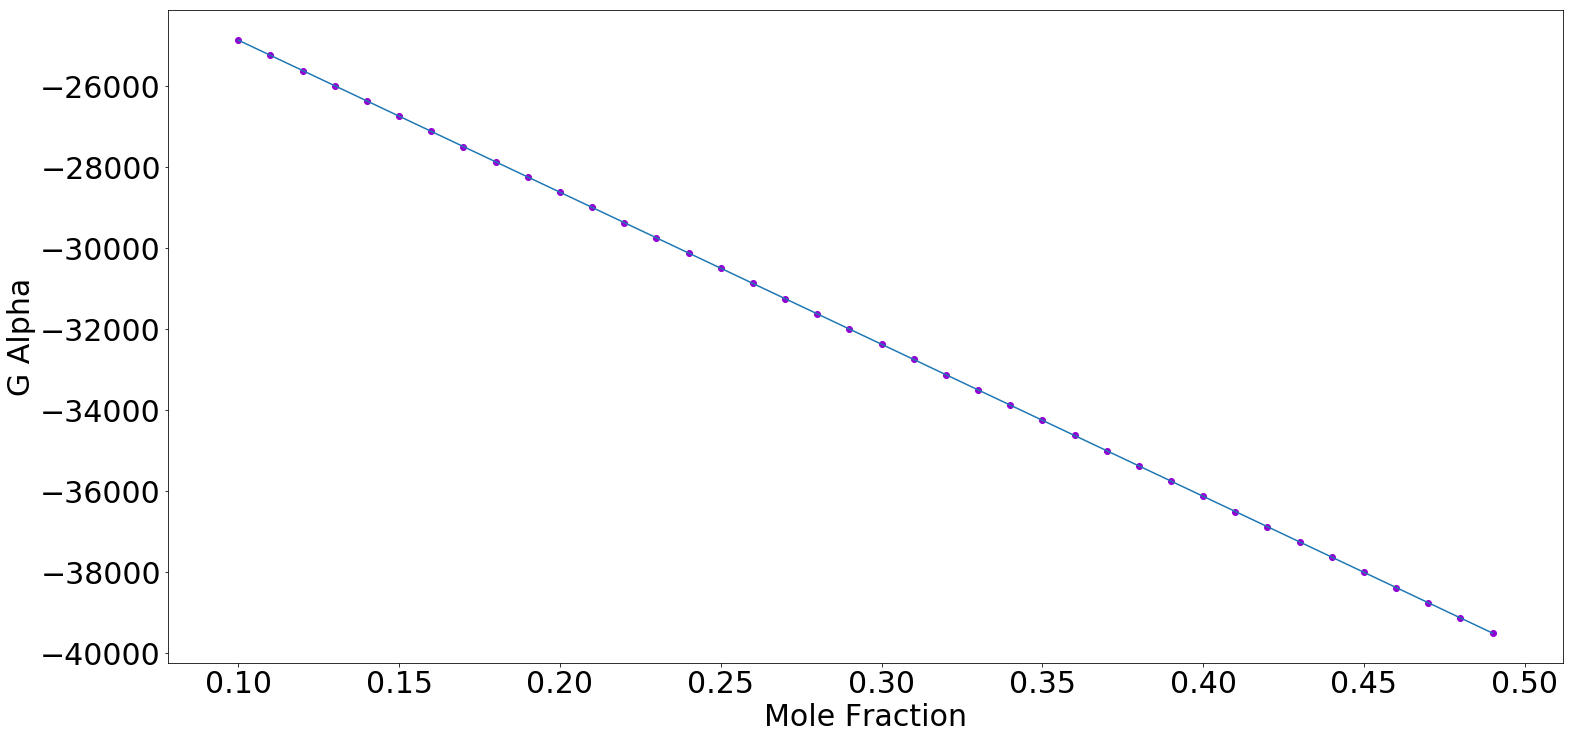

In [44]:
a = 1
b = 2
T=500
R = 8.314 #J/molK


GZr_V = -7827.595+125.64905*T -24.1618*T*np.log(T)-0.00437791*((T)**2)+34971.0*(1/T)
GZr_H = (-45965.0+41.6*T) + 1*(-7827.595+125.64905*T-24.1618*T*np.log(T)-0.00437791*(T**(2))+34971.0*(1/T))+1*(0.5*(-9522.9741+78.5273879*T-31.35707*T*np.log(T)+0.0027589925*(T**(2))-7.46390667*(10**(-7))*(T**(3))+56582.3*(1/T)))  
Lzr = 0
    
def alphagibbs(x):
    m = ((1-2*x)* GZr_V) + (x*GZr_H) + 1/(a+(b*(x/(1-x))))*((x/(1-x))*(1-(x/(1-x)))*Lzr)
    return (m)

x=np.arange(0.1,0.5,0.01)
fig, ax = plt.subplots(figsize=(25,12))
plt.scatter(x,alphagibbs(x), color='darkviolet')
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel('Mole Fraction',fontsize=30)
plt.ylabel('G Alpha',fontsize=30)
plt.plot()

#Polynomial Fitting
palpha =np.polyfit(x,alphagibbs(x),1)
print(palpha)
PolyEqu = palpha[0]*x +  palpha[1]
plt.plot(x,PolyEqu)



### Chemical Potenital of Alpha Phase

4157.0*x*log(x) - 37552.1439441568*x + 4157.0*(-x + 0.5)*log(-x + 0.5) - 21105.6644762286
The Chem Potential of Alpha is
-(-4157.0*x + 2078.5)/(-x + 0.5) + 4157.0*log(x) - 4157.0*log(-x + 0.5) - 33395.1439441568


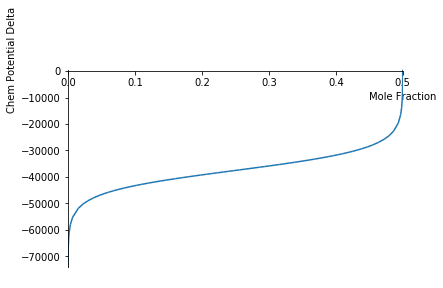

In [45]:
#The chemical potential is found by calculating the derivative of the gibbs free energy
x = Symbol('x')
tot_gfe_alpha = palpha[0]*x +  palpha[1] + R*T*(x*ln(x) + (0.5-x)*ln(0.5-x))
print(tot_gfe_alpha)
chemical_pot_alpha = diff(tot_gfe_alpha, x)
print('The Chem Potential of Alpha is')
print(chemical_pot_alpha)

plot(chemical_pot_alpha, (x,0,0.5), xlabel= 'Mole Fraction',ylabel='Chem Potential Alpha')

### Taylor Series Expansion for the Alpha Phase

0.01203615661446987
0.011079804862123089


[]

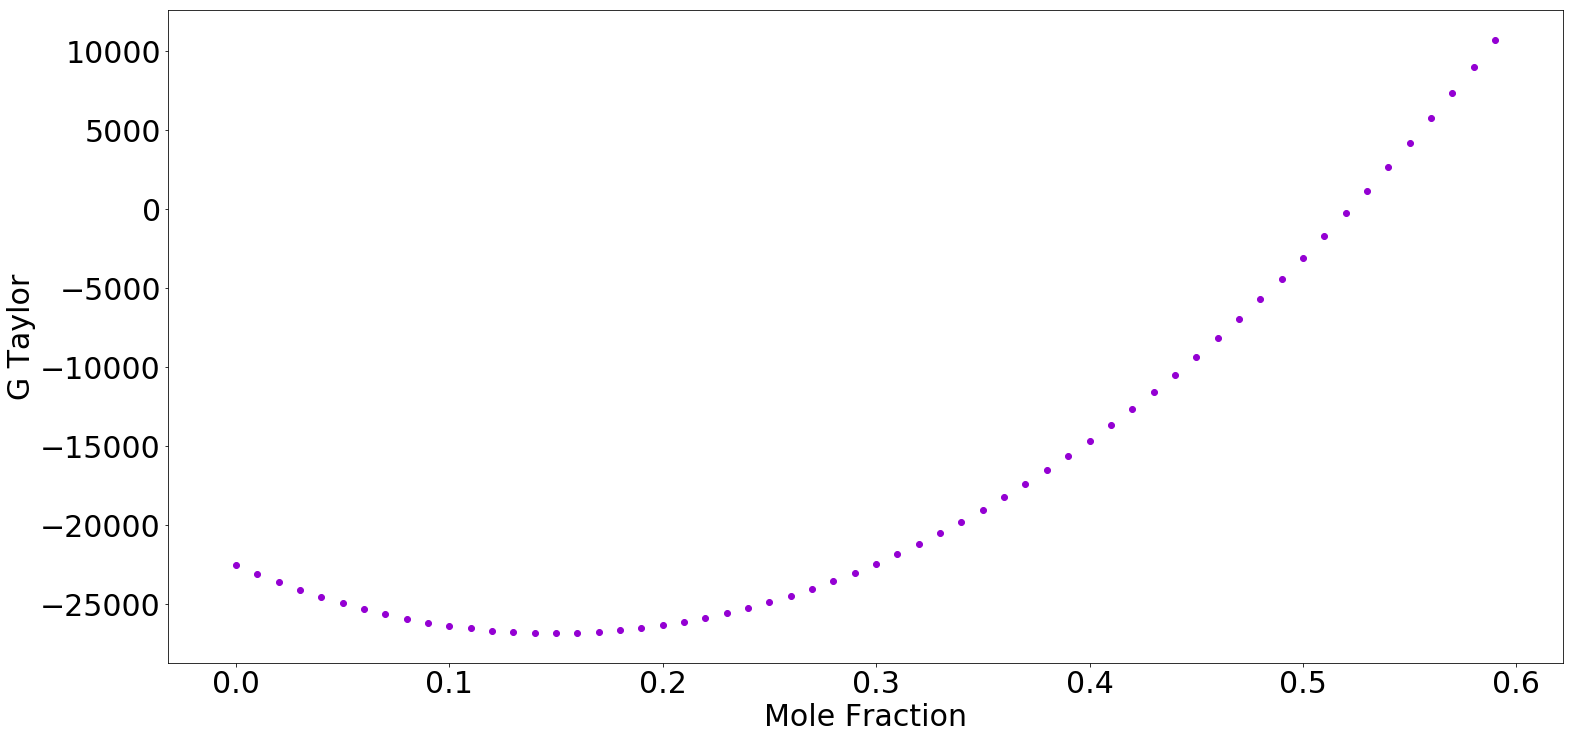

In [46]:
#the function for this was not trivial so it was manually calculated to be importantly if we have 200ppm of hydrogen dissolved
# in the alpha matrix we need to work out the mole fraction

frac_hydride=0.0002
amount_grams = 100
molar_mass_hydrogen = 1.001*1.66
molar_mass_zr = 91.224

moles_hydrogen = frac_hydride*amount_grams/molar_mass_hydrogen
print(moles_hydrogen)
moles_Zr = (1-frac_hydride*amount_grams)*amount_grams/molar_mass_zr

mole_frac_hydrogen = moles_hydrogen/(moles_hydrogen+moles_Zr)
print(mole_frac_hydrogen)

a = mole_frac_hydrogen

def taylor(x):
    f= -23179.2 -53325.7*(x-a) + 193205*(x-a)**2
    return (f)

x=np.arange(0,0.6,0.01)
fig, ax = plt.subplots(figsize=(25,12))
plt.scatter(x,taylor(x), color='darkviolet')
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel('Mole Fraction',fontsize=30)
plt.ylabel('G Taylor',fontsize=30)
plt.plot()




[]

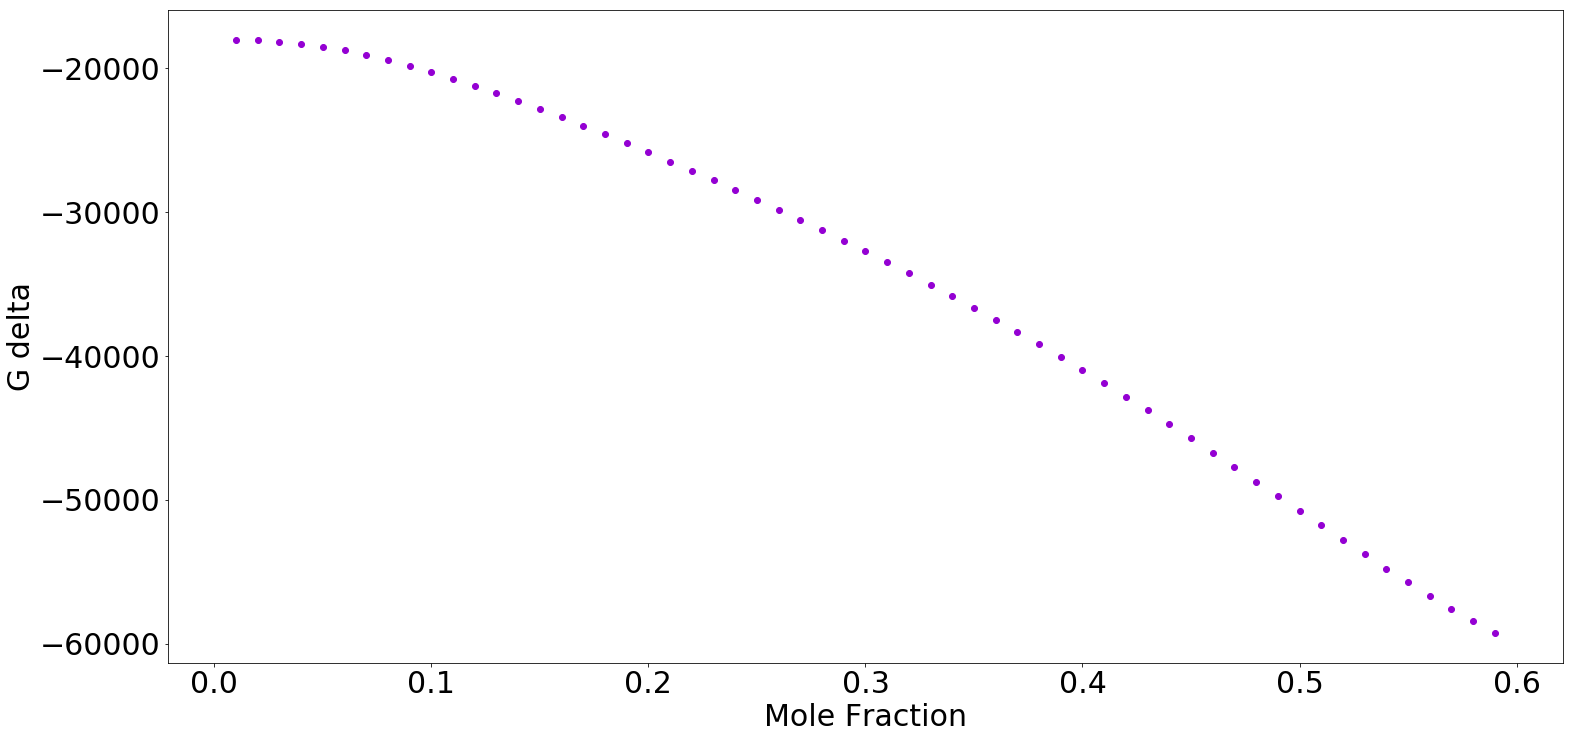

In [53]:
## The GFE curve of the delta phase
def total_gfe_delta(x):
    a = pdelta[0]*x**5 + pdelta[1]*x**4 + pdelta[2]*x**3 + pdelta[3]*x**2 +pdelta[4]*x + pdelta[5] + R*T*(x*np.log(x) + (0.667-x)*np.log(0.667-x)) 
    return (a)

x=np.arange(0.01,0.6,0.01)
fig, ax = plt.subplots(figsize=(25,12))
plt.scatter(x,total_gfe_delta(x), color='darkviolet')
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlabel('Mole Fraction',fontsize=30)
plt.ylabel('G delta',fontsize=30)
plt.plot()



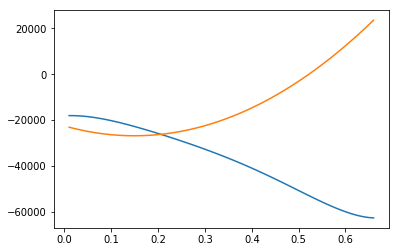

In [49]:
## Plotting both on the same curve
x = np.arange(0.01, 0.667, 0.01)
a = pdelta[0]*x**5 + pdelta[1]*x**4 + pdelta[2]*x**3 + pdelta[3]*x**2 +pdelta[4]*x + pdelta[5] + R*T*(x*np.log(x) + (0.667-x)*np.log(0.667-x))
f= -23179.2 -53325.7*(x-0.011) + 193205*(x-0.011)**2

plt.plot(x,a,x,f)

